Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Install a pip package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install seaborn

In [2]:
import seaborn as sns
import datetime
pd.set_option('display.max_rows', 500)
import random

Set seeds for reproducability

In [3]:
np.random.seed(0)

In [4]:
df = pd.read_csv("C:/Users/nejat/OneDrive/Desktop/environments/Brazil/sudeste.csv")

In [5]:
df.head()

,wsid,wsnm,elvt,lat,lon,inme,city,prov,mdct,date,...,tmax,dmax,tmin,dmin,hmdy,hmax,hmin,wdsp,wdct,gust
0,178,SÃO GONÇALO,237.0,-6.835777,-38.311583,A333,São Gonçalo,RJ,2007-11-06 00:00:00,2007-11-06,...,29.7,16.8,25.5,10.8,35.0,58.0,32.0,3.2,101.0,6.5
1,178,SÃO GONÇALO,237.0,-6.835777,-38.311583,A333,São Gonçalo,RJ,2007-11-06 01:00:00,2007-11-06,...,29.9,13.6,29.0,12.2,39.0,39.0,35.0,3.6,94.0,6.4
2,178,SÃO GONÇALO,237.0,-6.835777,-38.311583,A333,São Gonçalo,RJ,2007-11-06 02:00:00,2007-11-06,...,29.0,14.0,27.4,13.6,44.0,44.0,39.0,2.5,93.0,6.9
3,178,SÃO GONÇALO,237.0,-6.835777,-38.311583,A333,São Gonçalo,RJ,2007-11-06 03:00:00,2007-11-06,...,27.4,16.9,25.8,14.1,58.0,58.0,44.0,1.7,96.0,5.8
4,178,SÃO GONÇALO,237.0,-6.835777,-38.311583,A333,São Gonçalo,RJ,2007-11-06 04:00:00,2007-11-06,...,26.3,17.0,25.3,16.4,57.0,58.0,56.0,3.1,110.0,7.5


In [6]:
print(df['mdct'].tail())
df['mdct'].dtype

9779163    2016-09-30 19:00:00
9779164    2016-09-30 20:00:00
9779165    2016-09-30 21:00:00
9779166    2016-09-30 22:00:00
9779167    2016-09-30 23:00:00
Name: mdct, dtype: object


dtype('O')

Above I checked if the dates we see are objects without any strings involved. Yes, it is an object without strings. (O reffers 'object')

However, Python does not know these are actually "dates". We need change dtype: object to dtype: datetime64.

In [7]:
df['date_parsed'] = pd.to_datetime(df['mdct'], infer_datetime_format = True)




Lets check if the date_parsed contains the correct type of data type.

In [95]:
df['date_parsed']

0         2007-11-06 00:00:00
1         2007-11-06 01:00:00
2         2007-11-06 02:00:00
3         2007-11-06 03:00:00
4         2007-11-06 04:00:00
                  ...        
9779163   2016-09-30 19:00:00
9779164   2016-09-30 20:00:00
9779165   2016-09-30 21:00:00
9779166   2016-09-30 22:00:00
9779167   2016-09-30 23:00:00
Name: date_parsed, Length: 9779168, dtype: datetime64[ns]

Now that we have a column of parsed dates, we can extract information like the day of the month.

C:\Users\nejat\anaconda3\envs\BrazilWeather\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='date_parsed'>

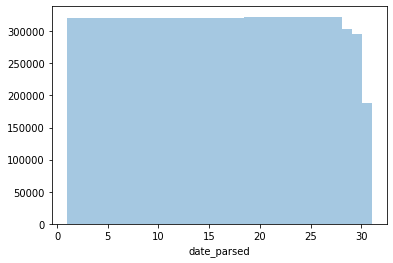

In [9]:
day_of_month = df['date_parsed'].dt.day
sns.distplot(day_of_month, kde = False, bins =31)
# Checking if the day format is correct. Not all months have 31 days.


Now that we are finished with the date. We can set it as index for out dataset.

In [10]:
df.index

RangeIndex(start=0, stop=9779168, step=1)

Lets discover what are our columns.

In [11]:
df.columns

Index(['wsid', 'wsnm', 'elvt', 'lat', 'lon', 'inme', 'city', 'prov', 'mdct',
       'date', 'yr', 'mo', 'da', 'hr', 'prcp', 'stp', 'smax', 'smin', 'gbrd',
       'temp', 'dewp', 'tmax', 'dmax', 'tmin', 'dmin', 'hmdy', 'hmax', 'hmin',
       'wdsp', 'wdct', 'gust', 'date_parsed'],
      dtype='object')

Lets drop some date related columns which we wont need in the future.

In [93]:
df.drop(['date','yr','mdct','mo','da'],axis=1, inplace=True)

KeyError: "['date' 'yr' 'mdct' 'mo' 'da'] not found in axis"

In [13]:
df.drop('hr',axis=1, inplace=True)

Check out for the null values in the dataset.

In [14]:
na_values =df.isna().sum()

In [15]:
columns_descriptions = {
    "wsid": "Weather station id",
    "wsnm": "Name station (usually city location or nickname)",
    "elvt": "Elevation",
    "lat": "Latitude",
    "lon": "Longitude",
    "inme": "Station number (INMET number) for the location",
    "city": "City",
    "prov": "State (Province)",
    "mdct": "Observation Datetime (complete date: date + time)",
    "date": "Date of observation",
    "yr": "The year (2000-2016)",
    "mo": "The month (0-12)",
    "da": "The day (0-31)",
    "hr": "The hour (0-23)",
    "prcp": "Amount of precipitation in millimetres (last hour)",
    "stp": "Air pressure for the hour in hPa to tenths (instant)",
    "smax": "Maximum air pressure for the last hour in hPa to tenths",
    "smin": "Minimum air pressure for the last hour in hPa to tenths",
    "gbrd": "Solar radiation KJ/m2",
    "temp": "Air temperature (instant) in celsius degrees",
    "dewp": "Dew point temperature (instant) in celsius degrees",
    "tmax": "Maximum temperature for the last hour in celsius degrees",
    "dmax": "Maximum dew point temperature for the last hour in celsius degrees",
    "tmin": "Minimum temperature for the last hour in celsius degrees",
    "dmin": "Minimum dew point temperature for the last hour in celsius degrees",
    "hmdy": "Relative humid in % (instant)",
    "hmax": "Maximum relative humid temperature for the last hour in %",
    "hmin": "Minimum relative humid temperature for the last hour in %",
    "wdsp": "Wind speed in metres per second",
    "wdct": "Wind direction in radius degrees (0-360)",
    "gust": "Wind gust in metres per second",
}

Knowing that 'wsid' indicates the station name, we need to discover which station has the most NA values. The one with the most NaN can be a good start for data cleaning process.

In [16]:
# Define a dataframe for columns with na values
na_columns= df.columns[na_values != 0].tolist()

In [17]:
df.wsid.unique() # to answer how many stations we have?

array([178, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312, 313, 314,
       315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325, 326, 327,
       328, 329, 330, 331, 332, 333, 334, 335, 336, 337, 338, 339, 340,
       341, 342, 343, 344, 345, 346, 347, 348, 349, 350, 351, 352, 353,
       354, 355, 356, 357, 358, 359, 360, 361, 362, 363, 364, 365, 366,
       367, 368, 369, 370, 371, 372, 373, 374, 375, 376, 377, 378, 379,
       380, 381, 382, 383, 384, 385, 386, 387, 388, 389, 390, 391, 392,
       393, 394, 395, 396, 397, 398, 399, 400, 401, 402, 403, 404, 405,
       406, 407, 408, 409, 410, 411, 412, 413, 414, 415, 416, 417, 418,
       419, 420, 421, 422, 423], dtype=int64)

In [18]:
dfi =df[na_columns].isna().groupby(df.wsid).sum()
dfi

,prcp,gbrd,temp,dewp,tmax,dmax,tmin,dmin,hmax,hmin,wdsp,gust
wsid,,,,,,,,,,,,
178,65219,32520,0,0,0,0,0,0,0,0,10133,2506
303,78849,36536,0,0,0,0,0,0,0,0,0,0
304,66201,33801,0,0,0,0,0,0,0,0,2599,218
305,77338,36872,0,0,0,0,0,0,0,0,4081,1505
306,77359,37445,0,0,0,0,0,0,0,0,0,0
307,78858,37267,0,0,0,0,0,0,0,0,0,0
308,77639,36290,0,0,0,0,0,0,0,0,0,0
309,59778,31009,0,0,0,0,0,0,0,0,0,0
310,61839,31208,0,0,0,0,0,0,0,0,0,0


In [19]:
dfi['Total']=dfi.sum(axis=1)

In [20]:
print(dfi[dfi.Total== dfi.Total.max()])

        prcp   gbrd  temp  dewp  tmax  dmax  tmin  dmin  hmax  hmin   wdsp  \
wsid                                                                         
371   120855  60848     0     0     0     0     0     0     0     0  14552   

      gust   Total  
wsid                
371   6493  202748  


It seems station 371 is the station which contains most of the missing values in this dataset. Let's figure out why.

In [394]:
station_371=df[df['wsid']==371].copy()


In [349]:
station_371


,wsid,wsnm,elvt,lat,lon,inme,city,prov,prcp,stp,...,dmax,tmin,dmin,hmdy,hmax,hmin,wdsp,wdct,gust,date_parsed
5493152,371,ECOLOGIA AGRÍCOLA,35.0,-22.757868,-43.684843,A601,Seropédica,RJ,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2000-05-24 00:00:00
5493153,371,ECOLOGIA AGRÍCOLA,35.0,-22.757868,-43.684843,A601,Seropédica,RJ,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2000-05-24 01:00:00
5493154,371,ECOLOGIA AGRÍCOLA,35.0,-22.757868,-43.684843,A601,Seropédica,RJ,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2000-05-24 02:00:00
5493155,371,ECOLOGIA AGRÍCOLA,35.0,-22.757868,-43.684843,A601,Seropédica,RJ,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2000-05-24 03:00:00
5493156,371,ECOLOGIA AGRÍCOLA,35.0,-22.757868,-43.684843,A601,Seropédica,RJ,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2000-05-24 04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5636523,371,ECOLOGIA AGRÍCOLA,35.0,-22.757868,-43.684843,A601,Seropédica,RJ,NaN,1012.9,...,18.8,18.8,18.2,98.0,98.0,93.0,3.3,176.0,6.9,2016-09-30 19:00:00
5636524,371,ECOLOGIA AGRÍCOLA,35.0,-22.757868,-43.684843,A601,Seropédica,RJ,0.2,1013.3,...,18.6,18.4,18.2,99.0,99.0,98.0,2.2,210.0,5.3,2016-09-30 20:00:00
5636525,371,ECOLOGIA AGRÍCOLA,35.0,-22.757868,-43.684843,A601,Seropédica,RJ,1.2,1013.8,...,18.3,18.1,17.9,99.0,99.0,98.0,3.0,224.0,4.8,2016-09-30 21:00:00
5636526,371,ECOLOGIA AGRÍCOLA,35.0,-22.757868,-43.684843,A601,Seropédica,RJ,0.4,1014.9,...,18.1,18.0,17.9,99.0,99.0,99.0,2.4,204.0,5.2,2016-09-30 22:00:00


5493152    False
5493153    False
5493154    False
5493155    False
5493156    False
           ...  
5636523    False
5636524    False
5636525    False
5636526    False
5636527    False
Name: date_parsed, Length: 143376, dtype: bool

It seems that 'prcp' , 'gbrd', 'wdsp', 'gust' columns has the missing values. What do these abbreviations mean?

In [38]:
# To do that we need to change the column descriptions from spanish to english (abvs as well)
cdesc= pd.read_csv("C:/Users/nejat/OneDrive/Desktop/environments/Brazil/columns_description.csv")

In [40]:
cdesc.drop(['column_index', 'columns_pt-br'], axis=1, inplace = True)

In [41]:
cdesc.drop(['columns_en'], axis=1, inplace = True)

In [42]:
cdesc.set_index('abbreviation', inplace =True)

In [43]:
meaningna_371=cdesc.loc[['prcp', 'gbrd', 'wdsp', 'gust']]

In [98]:
a = pd.DataFrame(meaningna_371)

In [99]:
print(meaningna_371.loc[meaningna_371.index == 'prcp'])

                                                    description
abbreviation                                                   
prcp          Amount of precipitation in millimetres (last h...


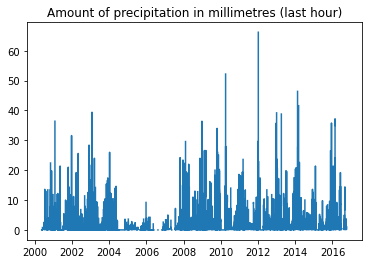

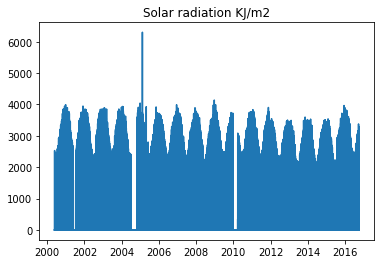

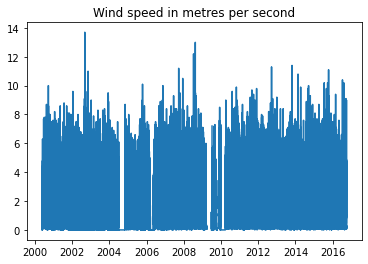

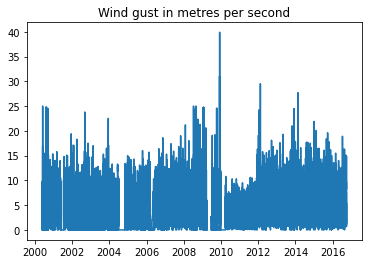

In [164]:
for index in meaningna_371.index:
    title = meaningna_371['description'][index]
    x = station_371['date_parsed']
    y= station_371[index]
    plt.figure()
    plt.plot(x,y)
    plt.title(title)
   # pd.DatetimeIndex(df['Date']).month

In [126]:
station_371.set_index('', inplace = True)

In [230]:
station_371['year'] = station_371['date_parsed'].dt.year

In [272]:
station_371_year_2000 =station_371[station_371['year']==2000]

4540

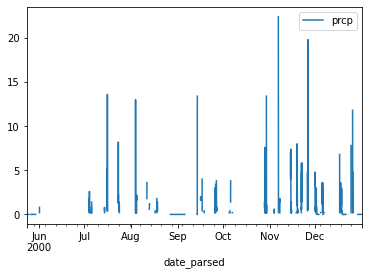

In [273]:
station_371_year_2000.plot(x='date_parsed', y= 'prcp')
station_371_year_2000.prcp.isna().sum()
 

Here we see the precipitation rate. In this graph, you can see that there are a lot of missing values throughout the year. But, this is because precipitation rate only starts recording when there is rain.
Therefore, we are going to set NAN values equal to zero.

In [376]:
station_371_filled = station_371[['prcp','year']].fillna(0)
station_371 = station_371[['prcp']].fillna(0)

In [293]:
average_rain_st371 =station_371_filled.groupby('year').mean()

<AxesSubplot:xlabel='year'>

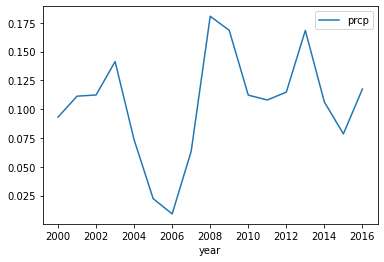

In [296]:
average_rain_st371.plot()

<AxesSubplot:xlabel='date_parsed'>

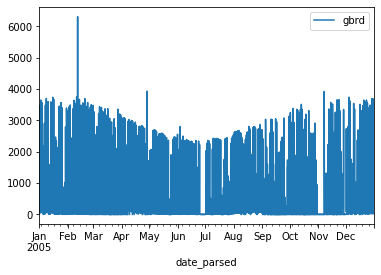

In [231]:
station_371_year_2000.plot(x='date_parsed', y= 'gbrd')

GBRD: Solar Radiation. GBRD values exists only when there is daylight. In the nighttime, there are no readings/only NANs. Therefore, I will set NANs for this parameter as equal to zero.

<AxesSubplot:xlabel='date_parsed'>

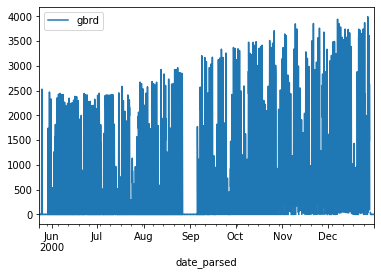

In [307]:
station_371_year_2000.plot(x='date_parsed',y='gbrd')

In [309]:
station_371_filled2=station_371[['gbrd','year']].fillna(0)

In [311]:
station_371_filled2.groupby('year').mean()

,gbrd
year,
2000,613.553679
2001,578.324429
2002,607.336416
2003,636.074201
2004,449.624765
2005,566.520075
2006,642.081399
2007,665.457104
2008,606.375850


<AxesSubplot:xlabel='year'>

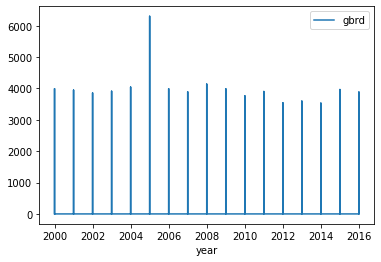

In [400]:
station_371_filled2.plot(x='year',y='gbrd')


<AxesSubplot:xlabel='date_parsed'>

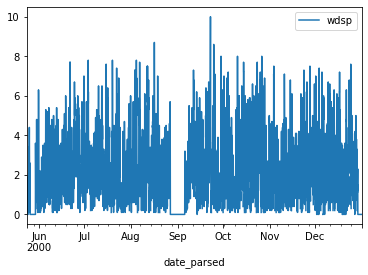

In [401]:
station_371_year_2000.plot(x='date_parsed', y= 'wdsp')

In [395]:
station_371['wdsp'].replace(0, np.nan, inplace = True)
station_371['wdsp'].interpolate('linear', inplace = True, limit_direction = 'both')

<AxesSubplot:xlabel='date_parsed'>

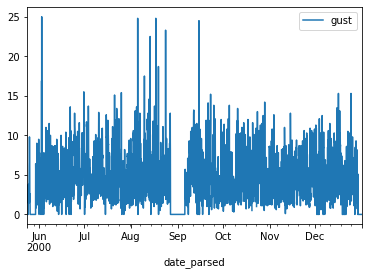

In [396]:
station_371_year_2000.plot(x='date_parsed', y= 'gust')

In [397]:
station_371['gust'].replace(0, np.nan, inplace = True)
station_371['gust'].interpolate('linear', inplace = True, limit_direction = 'both')

In [398]:
station_371['gbrd'].replace(np.nan, 0, inplace = True)
station_371['prcp'].replace(np.nan, 0, inplace = True)

In [399]:
station_371.isna().sum()

wsid           0
wsnm           0
elvt           0
lat            0
lon            0
inme           0
city           0
prov           0
prcp           0
stp            0
smax           0
smin           0
gbrd           0
temp           0
dewp           0
tmax           0
dmax           0
tmin           0
dmin           0
hmdy           0
hmax           0
hmin           0
wdsp           0
wdct           0
gust           0
date_parsed    0
dtype: int64